In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# After mounting your Google Drive, you can find the path to your files.
# For example, if you uploaded the files to the root of "My Drive", the paths would be:
# "/content/drive/My Drive/MPS-Jun-2025-Eng.pdf"
# "/content/drive/My Drive/MPS-July-2025-Eng.pdf"

# To find the exact path, you can navigate to the file in the file browser on the left,
# right-click on the file, and select "Copy path". Then, paste the copied path into the 'files' list
# in the analysis cell below (cell id: a8fe5698), replacing the current placeholder paths.

In [21]:
%pip install pdfplumber
%pip install textblob
%pip install collections
%pip install pandas
%pip install re
import pdfplumber
from textblob import TextBlob
from collections import Counter
import pandas as pd
import re

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [22]:
# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + "\n"
    return text

In [23]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'\n', ' ', text)  # remove newlines
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special characters/numbers
    return text.lower()


In [24]:

# Function to analyze sentiment
def sentiment_analysis(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity


In [25]:

# Function to count keywords
def keyword_frequency(text, keywords):
    words = text.split()
    counter = Counter(words)
    return {k: counter[k] for k in keywords}

In [28]:
# Load and analyze both PDFs
files = ["/content/drive/My Drive/MPS-Jun-2025-Eng.pdf", "/content/drive/My Drive/MPS-July-2025-Eng.pdf"]
keywords = ["inflation", "growth", "interest", "policy", "rate", "economy"]

results = []

for file in files:
    raw_text = extract_text_from_pdf(file)
    cleaned = clean_text(raw_text)
    polarity, subjectivity = sentiment_analysis(cleaned)
    freq = keyword_frequency(cleaned, keywords)
    results.append({
        "file": file,
        "polarity": polarity,
        "subjectivity": subjectivity,
        **freq
    })

In [29]:

# Save results to CSV
df = pd.DataFrame(results)
df.to_csv("monetary_policy_analysis.csv", index=False)

print(df)
# (polarity: -1 negative to +1 positive)


                                            file  polarity  subjectivity  \
0   /content/drive/My Drive/MPS-Jun-2025-Eng.pdf  0.055371      0.360452   
1  /content/drive/My Drive/MPS-July-2025-Eng.pdf  0.057238      0.350147   

   inflation  growth  interest  policy  rate  economy  
0         10      13         1       7     5        1  
1         12       8         0      10     5        0  


Now I will update the file paths in the analysis cell to point to the location of the files in your Google Drive. **Please update the paths in the code below to the correct location of your files in Google Drive.**

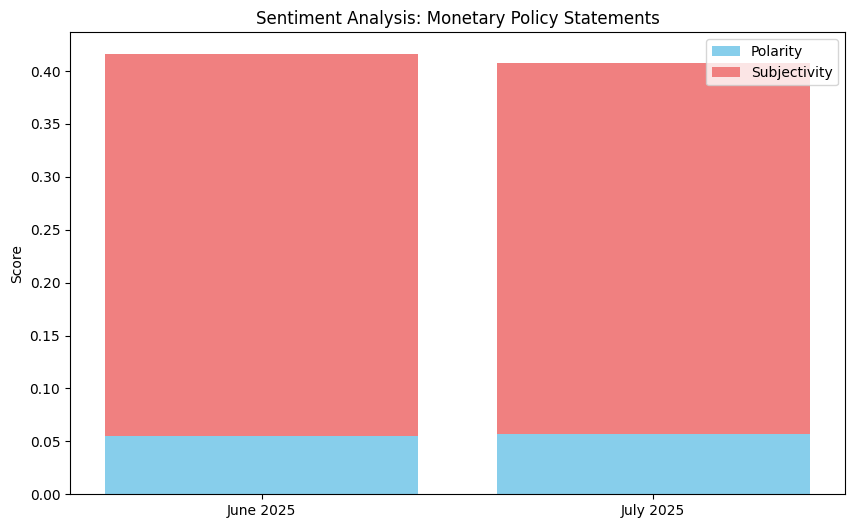

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df has these columns
# df = pd.DataFrame({ 'file': [...], 'pos': [...], 'neg': [...], 'neu': [...] })

df['month'] = ['June 2025', 'July 2025']

sentiment_cols = ['pos', 'neg', 'neu']
df_plot = df.melt(id_vars='month', value_vars=sentiment_cols, var_name='Sentiment', value_name='Score')

plt.figure(figsize=(8,6))
for sentiment in sentiment_cols:
    plt.bar(df['month'], df[sentiment], label=sentiment.capitalize())

plt.title('Sentiment Comparison: Monetary Policy Statements')
plt.ylabel('Score')
plt.legend()
plt.show()


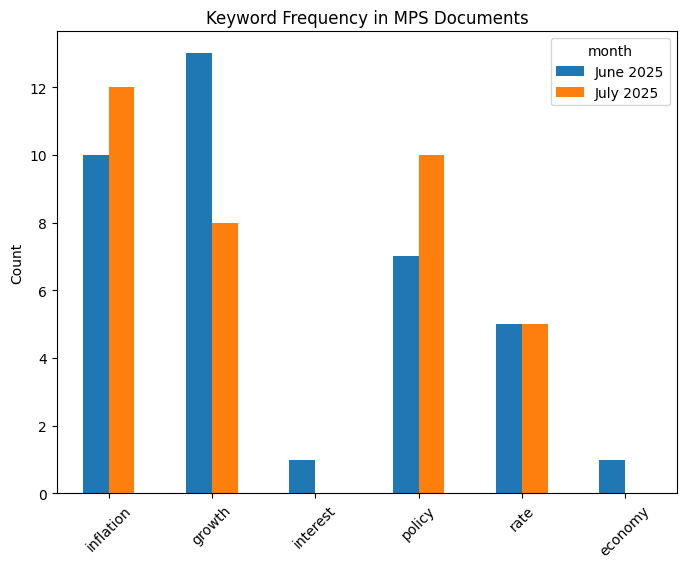

In [32]:
keywords = ['inflation', 'growth', 'interest', 'policy', 'rate', 'economy']
df_keywords = df[['Month'] + keywords].set_index('Month').T

df_keywords.plot(kind='bar', figsize=(8,6))
plt.title('Keyword Frequency in MPS Documents')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [35]:
%pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.0 MB/s eta 0:00:00


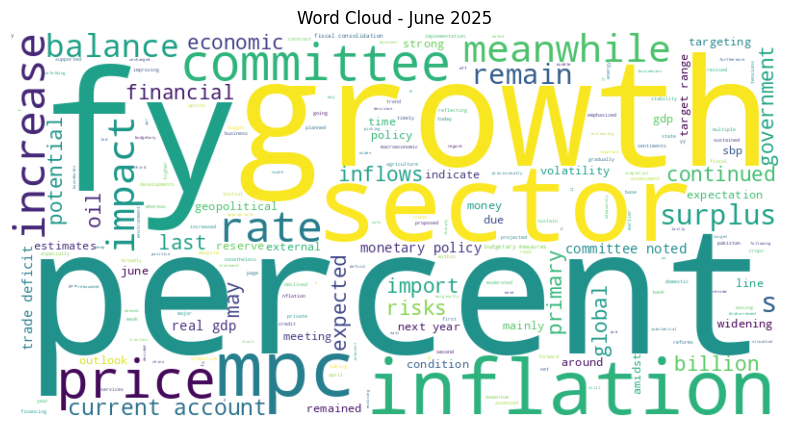

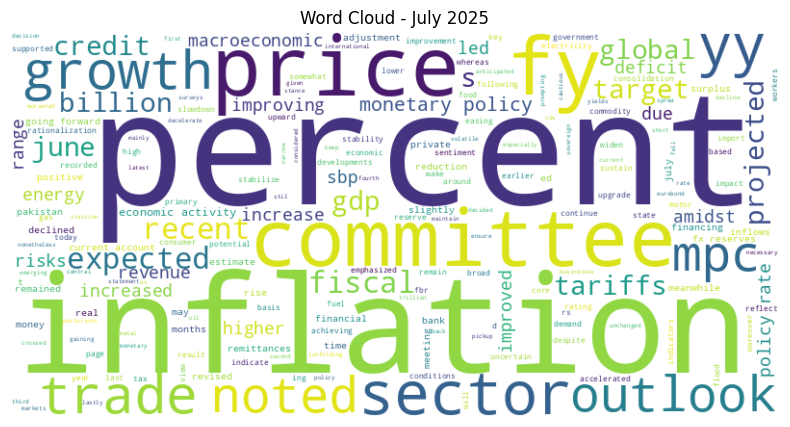

In [36]:
from wordcloud import WordCloud
import PyPDF2
import re

def extract_text(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            text += page.extract_text()
    return text

text_june = extract_text("/content/drive/My Drive/MPS-Jun-2025-Eng.pdf")
text_july = extract_text("/content/drive/My Drive/MPS-July-2025-Eng.pdf")

def clean_text(text):
    return re.sub(r'[^a-zA-Z\s]', '', text).lower()

text_june_clean = clean_text(text_june)
text_july_clean = clean_text(text_july)

for month, text in zip(['June 2025', 'July 2025'], [text_june_clean, text_july_clean]):
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {month}')
    plt.show()


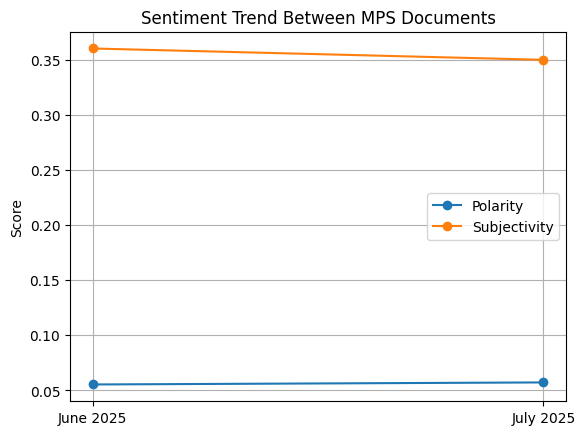

In [38]:
plt.plot(df['month'], df['polarity'], marker='o', label='Polarity')
plt.plot(df['month'], df['subjectivity'], marker='o', label='Subjectivity')
plt.title('Sentiment Trend Between MPS Documents')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

Polarity (blue line) – Measures the degree of positivity or negativity in the text.

Scale: from -1 (very negative) to +1 (very positive).

Both months have low polarity scores (~0.056), meaning the statements are slightly positive but mostly neutral in tone.

No significant change between June and July.

Subjectivity (orange line) – Measures how opinion-based (subjective) vs. fact-based (objective) the text is.

Scale: 0 (completely objective) to 1 (completely subjective).

Both months have moderate subjectivity scores (~0.35), meaning there’s some descriptive or interpretive language but the tone is mostly factual.

A slight decline from June to July, suggesting July’s statement was slightly more objective.

